<a href="https://colab.research.google.com/github/ann04ka/CV_exercises/blob/main/AlexNet_and_its_feature_maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.0/125.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 38.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfull

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [57]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## AlexNet

In [4]:
from IPython.display import Image
Image(url='https://d2l.ai/_images/alexnet.svg')

In [58]:
class AlexNet(d2l.Classifier):
    def __init__(self, lr=0.1, num_classes=10):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(
            nn.LazyConv2d(96, kernel_size=11, stride=4, padding=1),
            nn.ReLU(), nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(256, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(384, kernel_size=3, padding=1), nn.ReLU(),
            nn.LazyConv2d(256, kernel_size=3, padding=1), nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2), nn.Flatten(),
            nn.LazyLinear(4096), nn.ReLU(), nn.Dropout(p=0.5),
            nn.LazyLinear(4096), nn.ReLU(),nn.Dropout(p=0.5),
            nn.LazyLinear(num_classes))
        self.net.apply(d2l.init_cnn)

In [59]:
AlexNet().layer_summary((1, 1, 224, 224))

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

## Training

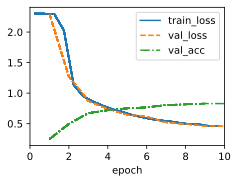

In [61]:
model = AlexNet(lr=0.01).to(device)
data = d2l.FashionMNIST(batch_size=128, resize=(224, 224))
trainer = d2l.Trainer(max_epochs=10, num_gpus=1)
trainer.fit(model, data)

## Feature maps

In [62]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


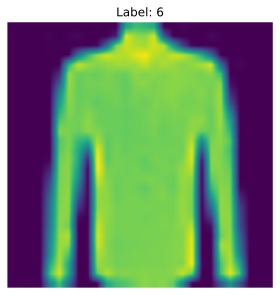

In [77]:
for images, labels in data.train_dataloader():
    break

image = images[7]
label = labels[7]

image_display  = image.permute(1, 2, 0).numpy()

plt.imshow(image_display)
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

In [79]:
def visualize_feature_maps(model, image, device):
    layers = list(model.net)
    x = image.unsqueeze(0).to(device)
    for i, layer in enumerate(layers):
        x = layer(x)
        if isinstance(layer, nn.Conv2d):
            print(f"Layer {i}: {layer}")
            num_feature_maps = 8 * 8
            num_cols = 8
            num_rows = (num_feature_maps + num_cols - 1) // num_cols
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
            for j in range(num_feature_maps):
                row = j // num_cols
                col = j % num_cols
                axes[row, col].imshow(x[0, j].detach().cpu().numpy(), cmap='viridis')
                axes[row, col].axis('off')
            for k in range(j + 1, num_rows * num_cols):
                row = k // num_cols
                col = k % num_cols
                axes[row, col].axis('off')
            plt.suptitle(f"Feature Maps of Layer {i}")
            plt.show()

Layer 0: Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))


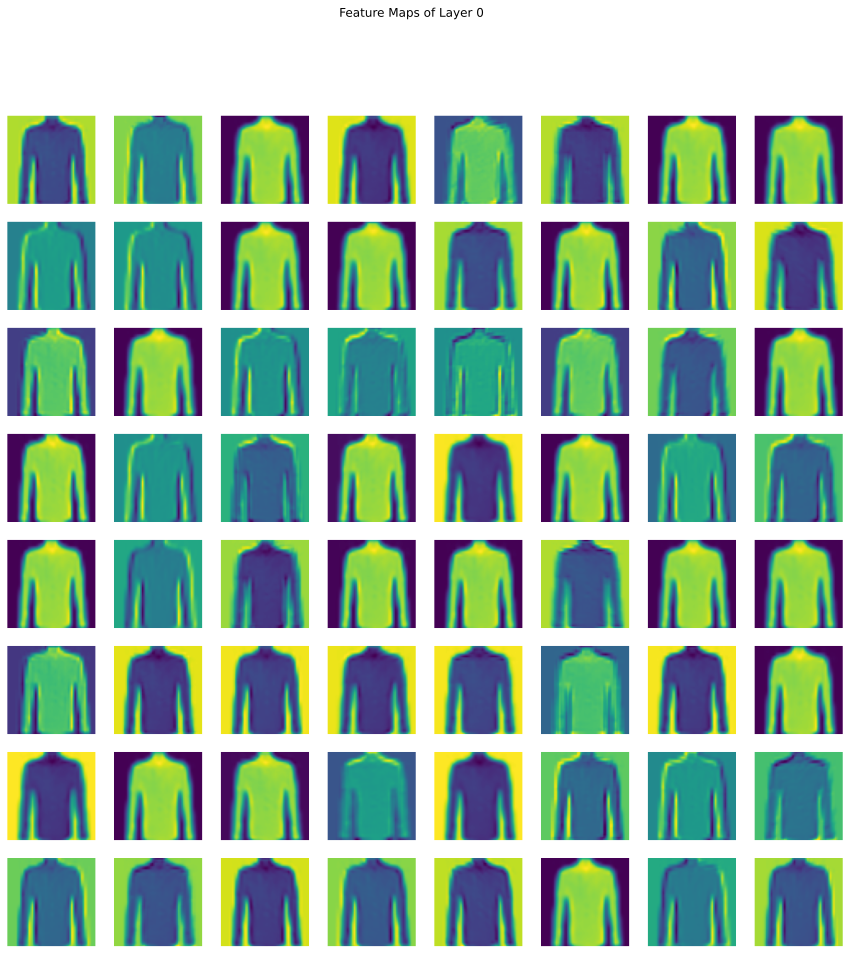

Layer 3: Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))


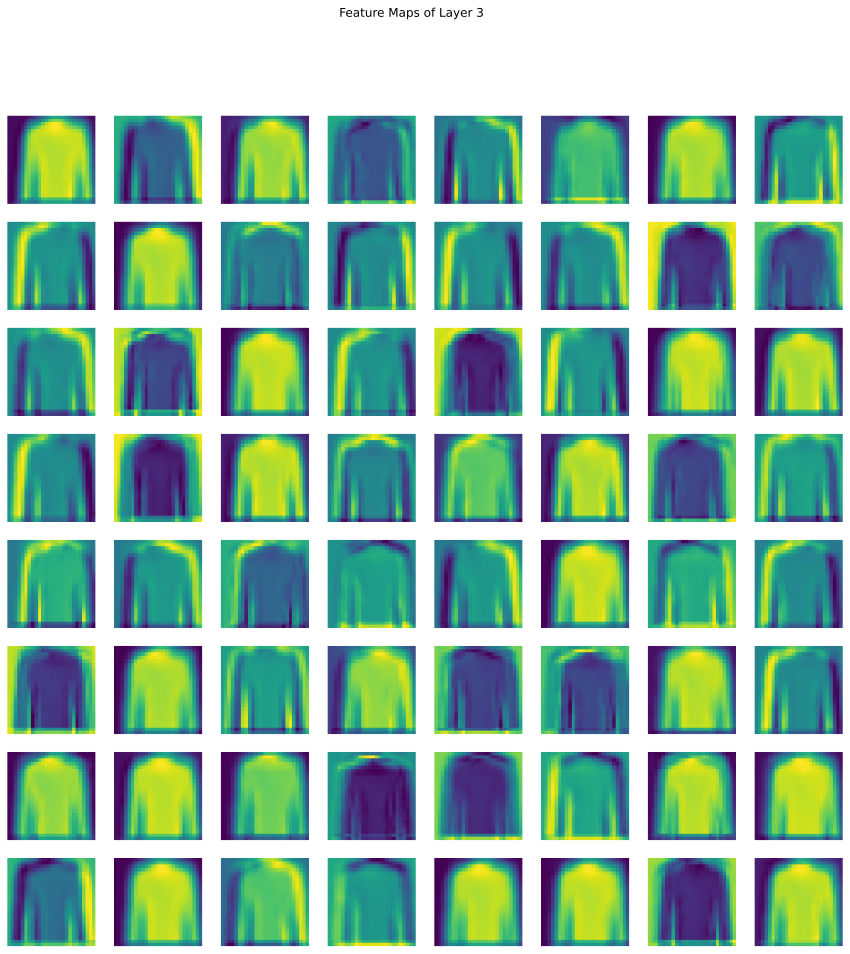

Layer 6: Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


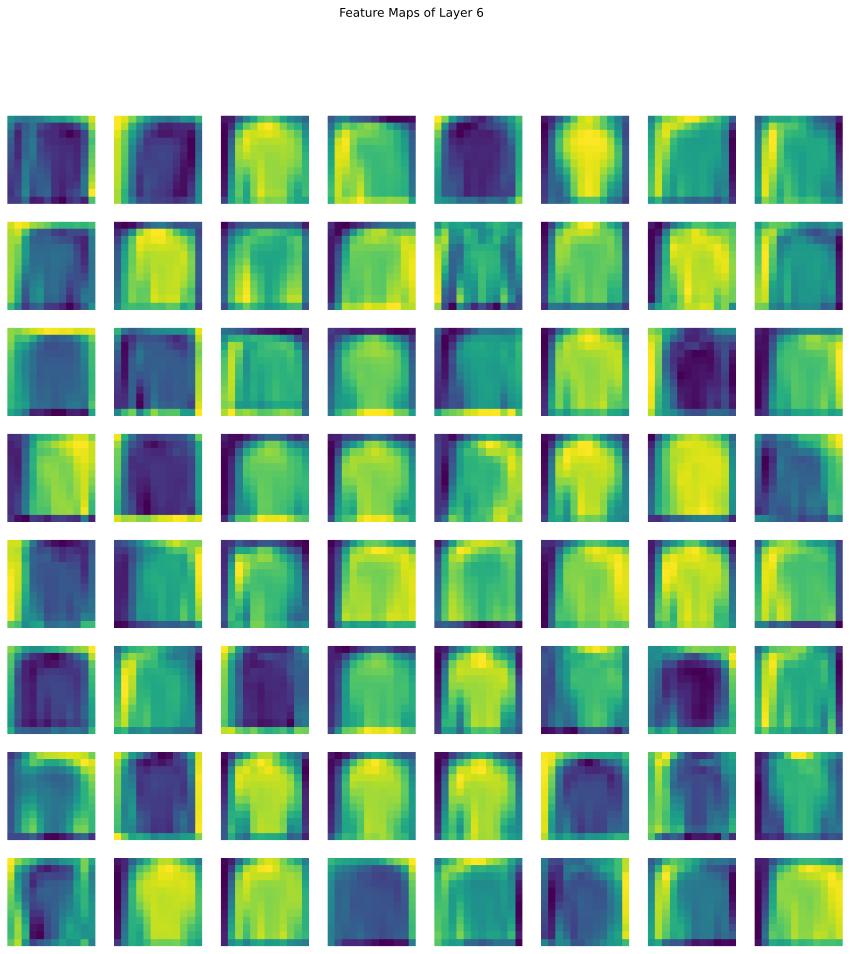

Layer 8: Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


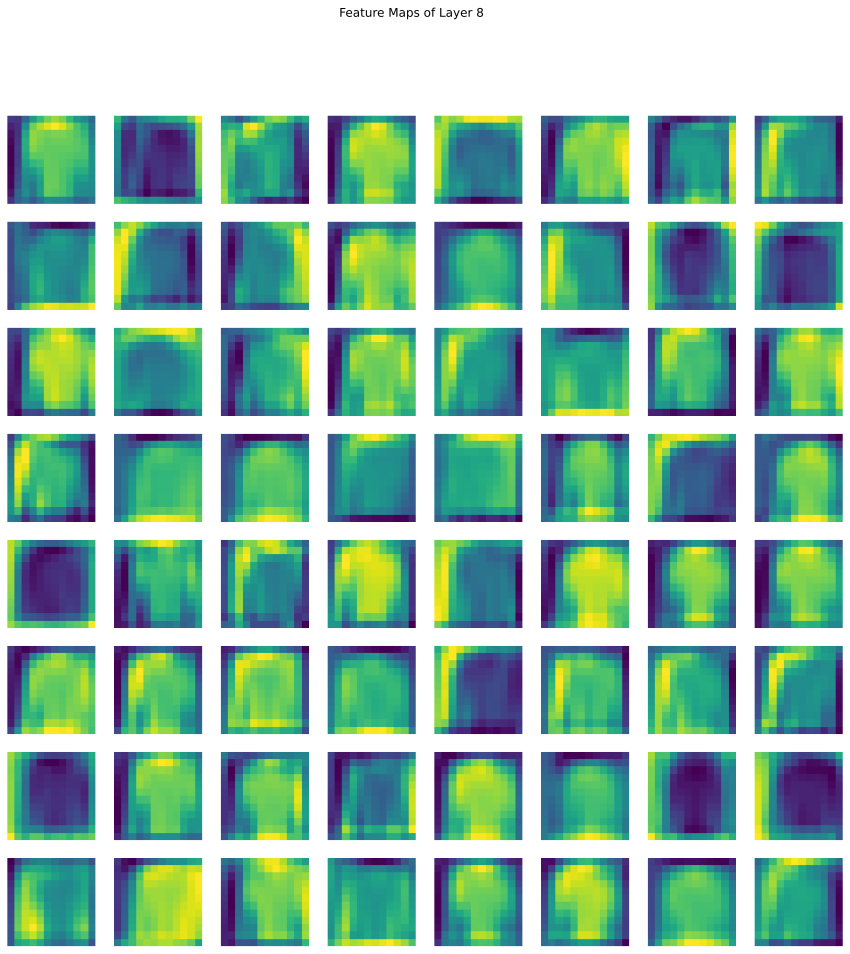

Layer 10: Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


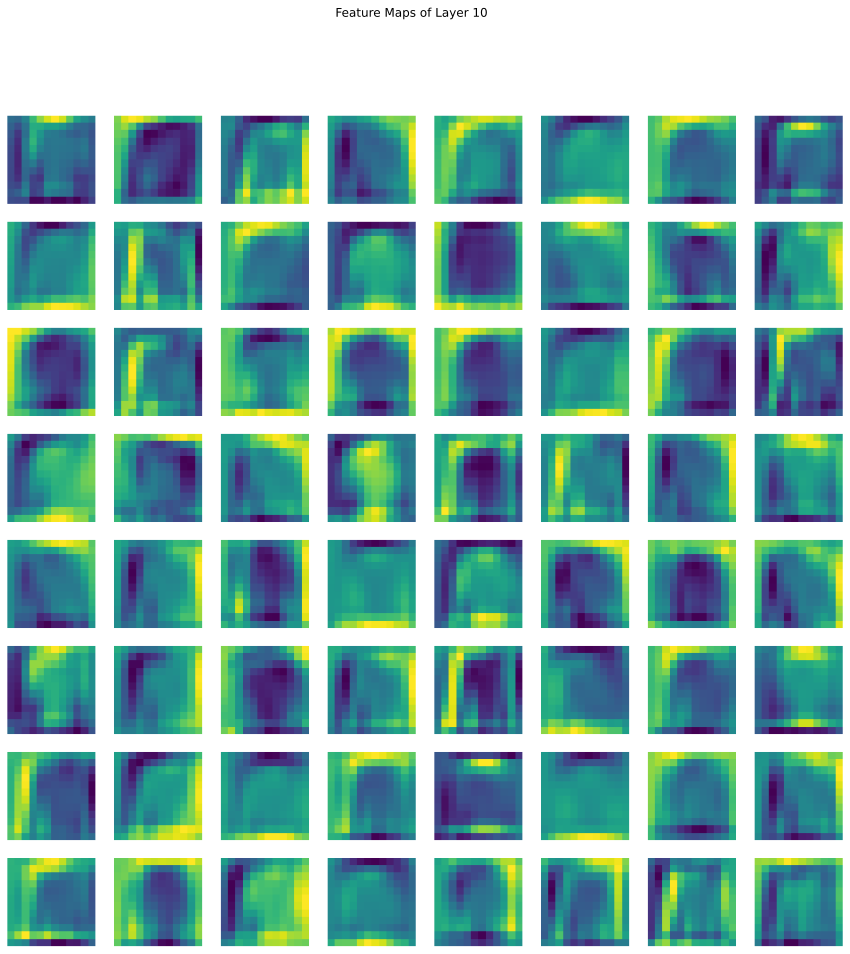

In [80]:
visualize_feature_maps(model, image, device)